## Multi-Class Models (Perceptron and Logistic Regression)

##### ChatGPT assisted with the code structure and model recommendations

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import statsmodels.api as sm
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
yelp_reviews = pd.read_csv('data/yelp_reviews_chunks.csv')

In [7]:
# Prepare the Data
X = [review.lower() for review in yelp_reviews['text']]  # Convert reviews to lowercase
y = yelp_reviews['stars'].tolist()  # Get the star ratings as a list

In [8]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Vectorize the Text
vectorizer = CountVectorizer(lowercase=False, min_df=1, token_pattern=r'\b\w+\b')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

### Multi-Class Perceptron

In [10]:
# Train the Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_vectorized, y_train)

Perceptron()

In [11]:
# Evaluate the Model
y_pred = perceptron.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6048882022230806
Precision: 0.5962698274105943
Recall: 0.6048882022230806
F1 Score: 0.5981722807677795


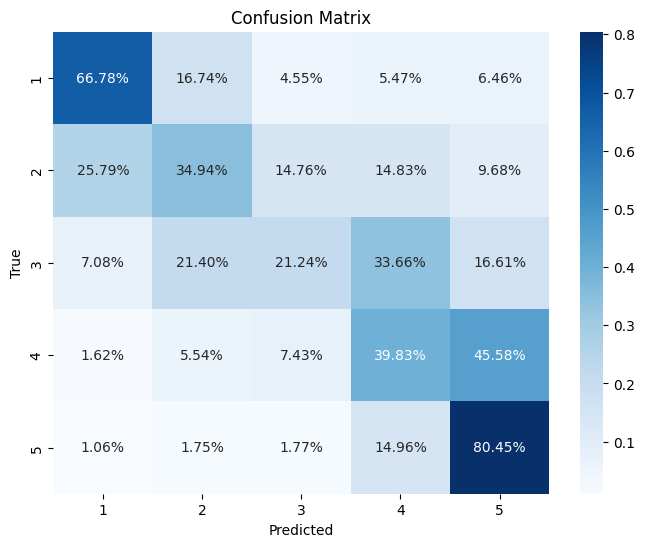

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate row-wise sums to compute percentages
row_sums = cm.sum(axis=1, keepdims=True)
cm_percent = cm / row_sums

# Create a DataFrame for better visualization
labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percent, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".2%", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Ordinal Logistic Regression

In [28]:
# Vectorize the Text Using TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False, min_df=1, token_pattern=r'\b\w+\b')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [29]:
# Train the Ordinal Logistic Regression Model
ordinal_logistic = SGDClassifier(loss='log', max_iter=1000)
ordinal_logistic.fit(X_train_vectorized, y_train)

c:\Users\Sanjeev HRSCM\myenv\Scripts\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [30]:
# Evaluate the Model
y_pred = ordinal_logistic.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6434273207158491
Precision: 0.6054478512443218
Recall: 0.6434273207158491
F1 Score: 0.5856384984008035


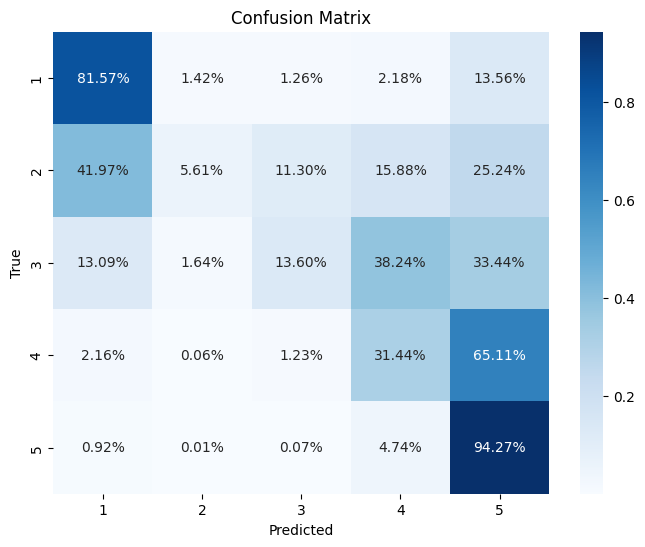

In [31]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate row-wise sums to compute percentages
row_sums = cm.sum(axis=1, keepdims=True)
cm_percent = cm / row_sums

# Create a DataFrame for better visualization
labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percent, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".2%", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()